### Examle 4.1

In [7]:
# 导入需要的包
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm



读入数据

In [2]:
data1=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/r20.csv")
data2=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/rs.csv")
data=data1['r20']-data2['rs']
data=data.dropna(axis=0,how='all')

将Example 3.2中得到的模型变成均值为0的序列，发现形式上接近于ARIMA(1,1,0)，因此考虑I(1)过程，作出$w_t=\bigtriangledown x_t$的图像并计算ACF和PACF,发现它们都是在k=1之后截尾，因此是AR(1)过程或MA(1)过程。

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


[ 1.          0.20895086  0.02664107 -0.01962762  0.01536111  0.03262511
  0.00266541 -0.01560874 -0.07097796 -0.08202336 -0.03710733 -0.00907282
  0.02095019 -0.01502065  0.01536243 -0.03890609 -0.00714755 -0.02272975
 -0.01022415  0.06046185  0.00971069 -0.14033487 -0.09693652  0.02320316
  0.02393744 -0.0342805  -0.07725361 -0.10233183 -0.03906335  0.00566725
  0.00127653 -0.03261293 -0.06504597  0.08405868  0.07114026  0.0522721
  0.02208499  0.00827339 -0.00428174  0.00536769  0.05834656]
[ 1.          0.20921738 -0.01784386 -0.02265599  0.0258682   0.02579986
 -0.01110476 -0.01418298 -0.06708314 -0.05808518 -0.00931163 -0.00142275
  0.024198   -0.02042105  0.02818068 -0.04981462  0.00390805 -0.03212911
 -0.00881177  0.06698437 -0.01393104 -0.15268318 -0.03648771  0.05566964
 -0.00733812 -0.04715232 -0.06259732 -0.07313    -0.00520401  0.0045692
 -0.03278323 -0.04191409 -0.05079288  0.12149782  0.02450252  0.00979406
 -0.00926927 -0.00218612 -0.02090083 -0.00398051  0.07034637]


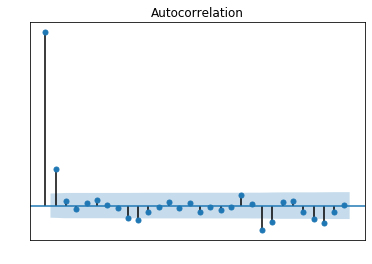

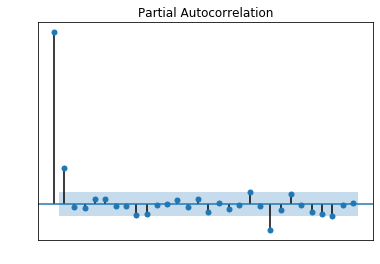

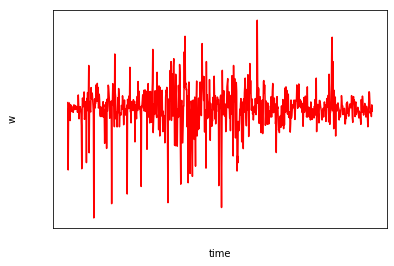

In [3]:
w=data.diff().dropna(axis=0,how='all')
ACF = smt.stattools.acf(w)
PACF=smt.stattools.pacf(w)
print(ACF)
print(PACF)
plot_acf(w)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plot_pacf(w)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()
plt.plot(w,'r')
plt.ylabel('w')
plt.xlabel('time')
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

用AR(1)过程拟合数据得到模型如下：$w_t=-0.0017+0.209w_{t-1}+a_t$

In [4]:
resultAR = AutoReg(w, 1).fit()
resultAR.summary()

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  785
Model:                     AutoReg(1)   Log Likelihood                -389.043
Method:               Conditional MLE   S.D. of innovations              0.397
Date:                Wed, 05 Aug 2020   AIC                             -1.838
Time:                        14:37:59   BIC                             -1.820
Sample:                             1   HQIC                            -1.831
                                  785                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0017      0.014     -0.117      0.907      -0.029       0.026
y.L1           0.2090      0.035      5.983      0.000       0.141       0.277
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.7857           +0.0000j            4.7857            0.0000
-----------------------------------------------------------------------------
"""

计算残差的portmanteau统计量如下，此结果说明残差接近于白噪声。结合w的图像，可以看出w的均值不显著大于0。因此该时间序列可以用ARIMA(1,1,0)来建模。

In [5]:
sm.stats.acorr_ljungbox(resultAR.resid, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,8.814067,0.718724


通过模型拟合得到的序列和真实数据对比：

In [6]:
# np.random.seed(7)
# x=np.zeros(len(data))
# a=np.random.randn(len(data))*0.398
# x[0]=data[0]
# x[1]=data[1]
# for t in range(2,len(data)):
#     x[t]=x[t-1]-0.0017+0.209*(x[t-1]-x[t-2])+a[t]
# # plt.plot(x,label="estimated data")
# # plt.plot(data,"r",label="original data")
# # plt.tick_params(axis='x',colors='white')
# # plt.tick_params(axis='y',colors='white')
# # plt.title(label='ARIMA(1,1,0) process estimation')
# # plt.legend()
# # plt.show()
# w_e=np.zeros(len(w))
# w_e[0]=data[1]-data[0]
# for t in range(1,len(w)):
#     w_e[t]=-0.0017+0.209*w_e[t-1]+a[t]
# plt.plot(w_e,label="estimated data")
# plt.plot(w,"r",label="original data")
# plt.tick_params(axis='x',colors='white')
# plt.tick_params(axis='y',colors='white')
# plt.title(label='ARIMA(1,1,0) process estimation')
# plt.legend()
# plt.show()

### Example 4.2

导入数据并作图查看

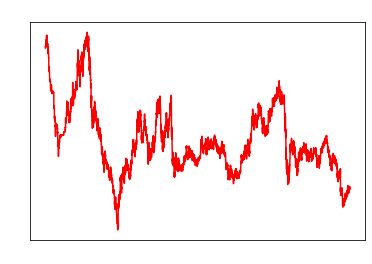

In [5]:
data=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/dollar.csv",skiprows=1)
plt.plot(data,'r')
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.title("dollor-pound exchange rate",color="white")
plt.show()

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


[ 1.00000000e+00  6.02072132e-02 -1.94745443e-02 -1.43804332e-02
  2.24442088e-03  9.71567645e-03  1.09478588e-02  2.68746588e-03
  5.09799527e-03 -5.75679469e-05  2.24201455e-03 -8.51819343e-03
 -1.23446042e-02  1.04857418e-02  1.40919749e-02  2.29578299e-02
  1.30373817e-02  7.42629447e-04 -1.14427574e-02  2.20577829e-02
  2.36581454e-02  1.55049738e-05 -8.16902089e-03 -2.34229435e-02
 -4.14017742e-03  6.89708195e-03  1.33251290e-03  1.69111003e-02
  2.38062547e-02  1.09110371e-03 -1.79741282e-03 -6.98980492e-03
  1.08768478e-02  1.87113797e-02  1.98942113e-02  1.40968270e-02
 -1.05008665e-02 -1.32397792e-02 -1.50659664e-02  3.59941478e-03
  7.36055116e-03]
[ 1.00000000e+00  6.02127797e-02 -2.31877937e-02 -1.18374516e-02
  3.41752664e-03  8.85818622e-03  9.80287084e-03  1.88483069e-03
  5.50797514e-03 -3.91791151e-04  2.42056476e-03 -8.92017006e-03
 -1.14292170e-02  1.15717160e-02  1.19834136e-02  2.16295125e-02
  1.13625647e-02  8.41096567e-04 -1.05487407e-02  2.34657626e-02
  1.996

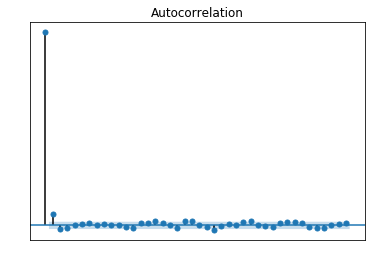

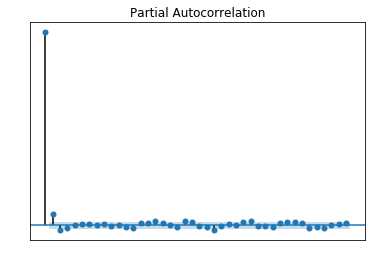

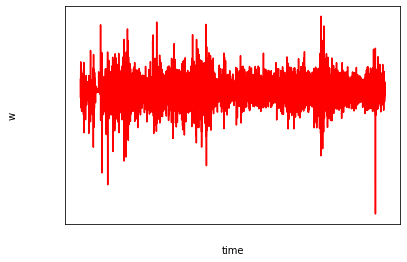

In [4]:
w=data.diff().dropna(axis=0,how='all')
ACF = smt.stattools.acf(w)
PACF=smt.stattools.pacf(w)
print(ACF)
print(PACF)
plot_acf(w)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plot_pacf(w)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()
plt.plot(w,'r')
plt.ylabel('w')
plt.xlabel('time')
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

可以看出，一阶差分数据类似于白噪声，其ACF和PACF都是只有一阶显著，因此考虑使用AR(1)模型拟合数据如下：

In [6]:
resultAR = AutoReg(w, 1).fit()
resultAR.summary()

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 2.3359   No. Observations:                10817
Model:                     AutoReg(1)   Log Likelihood               34234.118
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Thu, 06 Aug 2020   AIC                             -9.168
Time:                        15:22:20   BIC                             -9.166
Sample:                             1   HQIC                            -9.167
                                10817                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.698e-05   9.82e-05     -0.886      0.376      -0.000       0.000
2.3359.L1      0.0602      0.010      6.273      0.000       0.041       0.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           16.6085           +0.0000j           16.6085            0.0000
-----------------------------------------------------------------------------
"""

### Example 4.3

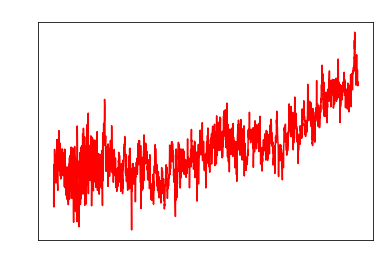

In [8]:
data=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/Global temperature.csv")
ts=data['value']
plt.plot(data['value'],'r')
plt.title("Global temperature",color="white")
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

可以看出，全球温度不是一个稳定的数据，因此我们考虑对它做一阶差分

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


[ 1.00000000e+00 -3.54504059e-01 -2.79306807e-02 -6.08270098e-02
 -1.30782330e-04 -1.68059550e-02 -2.96638672e-03  1.72307373e-02
 -3.56254639e-02 -1.15528090e-02  3.55701527e-02 -1.86566572e-02
 -4.93777406e-03  5.25620289e-02  7.79334072e-03 -3.67075277e-02
 -5.77099147e-02  2.78012729e-02 -7.24802031e-03  2.67204792e-02
 -2.77285109e-02 -3.45620745e-02  1.46898858e-02 -2.85647833e-02
  1.03511015e-01 -4.00184406e-02  3.99673995e-02 -3.77221991e-02
 -1.11866657e-02 -5.30010041e-02  6.33079002e-02 -5.29213381e-02
  3.64715873e-02 -5.67470633e-03 -2.14393616e-02 -1.48678551e-02
  6.49529428e-02  9.76561708e-04  4.27093131e-03 -2.19046382e-03
 -5.35533462e-02]
[ 1.00000000e+00 -3.54680079e-01 -1.75881984e-01 -1.59308853e-01
 -1.09637366e-01 -9.56109882e-02 -7.84868755e-02 -3.92673774e-02
 -7.25142380e-02 -7.87906419e-02 -2.18117188e-02 -3.98488069e-02
 -4.35642158e-02  3.11751113e-02  4.32849357e-02 -4.35724123e-03
 -7.64157359e-02 -3.94427159e-02 -3.93713680e-02 -7.64837707e-03
 -4.242

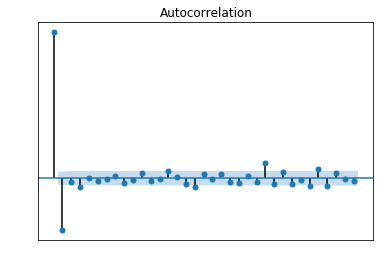

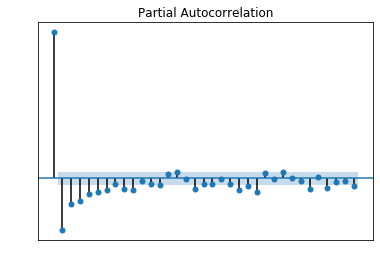

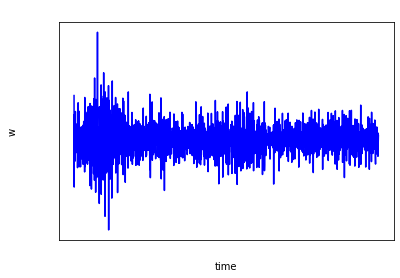

In [10]:
w=ts.diff().dropna(axis=0,how='all')
ACF = smt.stattools.acf(w)
PACF=smt.stattools.pacf(w)
print(ACF)
print(PACF)
plot_acf(w)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plot_pacf(w)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()
plt.plot(w,'b')
plt.title("first order of data",color="white")
plt.ylabel('w')
plt.xlabel('time')
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

从ACF的结果中可以看出，只有r1和r3是显著大于零的，而且PACF逐渐趋于零，前12阶大多都显著小于零，因此考虑使用ARIMA(0，1，3)对数据进行建模。

In [11]:
resultMA = smt.ARMA(w, order=(0, 3)).fit()
resultMA.summary()

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                 2015
Model:                     ARMA(0, 3)   Log Likelihood                1354.137
Method:                       css-mle   S.D. of innovations              0.124
Date:                Wed, 05 Aug 2020   AIC                          -2698.274
Time:                        14:38:03   BIC                          -2670.233
Sample:                             0   HQIC                         -2687.982
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0005      0.001      0.685      0.494      -0.001       0.002
ma.L1.value    -0.5042      0.022    -22.630      0.000      -0.548      -0.461
ma.L2.value    -0.0907      0.026     -3.543      0.000      -0.141      -0.041
ma.L3.value    -0.1165      0.023     -5.088      0.000      -0.161      -0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2504           -0.0000j            1.2504           -0.0000
MA.2           -1.0143           -2.4155j            2.6198           -0.3133
MA.3           -1.0143           +2.4155j            2.6198            0.3133
-----------------------------------------------------------------------------
"""

残差的portmanteau统计量如下：

In [12]:
sm.stats.acorr_ljungbox(resultMA.resid, lags=[12], return_df=True)


,lb_stat,lb_pvalue
12,11.469605,0.489159


可以看出模型的正确性。
此处的截距可以刻画序列的漂移，此处也就是温度变化的斜率，相当于每个世纪增加0.0005*1200=0.6℃，但是这并不显著区别于零。因此模型表示：尽管温度不是稳定的，它的变化可以看作带漂移的随机游走，因此并没有长期的随时间的变化趋势。